In [111]:
# Danica Padlan, dmp3357

In [112]:
# Standard Headers
# You may add additional headers here if needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np #to reference np.nan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'1.3.5'

# Assignment 1: Data Preprocessing

## Part 1: Data Cleaning, Exploration, and Feature Engineering

For this part of the assignment you'll be using the 1994 Adult Census Income dataset (`adult.csv`) collected by Ronny Kohavi and Barry Becker. It contains 32,561 records with 14 features.

Q1. Read the dataset from `adult.csv` into a Pandas dataframe. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

**Important:**
* Notice in the csv file that `?` is used to indicate missing values. We want all of the missing values to be represented by NaNs in the dataframe. Make sure that all of the `?` are converted to `NaN` in your dataframe!
* Also, set the `skipinitialspace` parameter to `True`. (This will be necessary for the `map()` function to work later in the assignment.)

In [113]:
#reading data from file, moves up data and uses first row as headers
data = pd.read_csv('adult.csv', skipinitialspace = True)

#replaces all '?' with NaN, replaces old 'data' with new 'data'
data = data.replace("?", np.nan)

#print data
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,NaN,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Q2. Start by looking for missing values. How many missing values are there in this dataset?

In [114]:
#print out how many missing values are there in each feature
print(data.isnull().sum())

#adding how many missing total values are in the data set
print("\nTotal num missing values:", data.isnull().sum().sum())

age                 28
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Total num missing values: 4290


Q3. Clean up some of the missing values. 
* Drop all of the records from the dataset that are missing `workclass` or `occupation`.
* For records missing values in `native-country`, impute those by using a "forward fill." This will fill in the missing value with the same value as the previous record. 
* For records missing `age`, leave those as-is for now. We will do a similar-case imputation on them later! 

Print something to show that there are no longer missing values in `workclass`, `occupation`, or `native-country`.

In [115]:
#drops records that have NaN for workclass or occupation
data.dropna(subset=['workclass', 'occupation'], inplace=True)

#forward fills values for native-country column
data.loc[:,'native-country'].fillna(method='ffill', inplace=True)

#prints count of nulls for each column
print("Number of Nulls in Workclass:")
print(data['workclass'].isnull().sum())

print("Number of Nulls in Occupation:")
print(data['occupation'].isnull().sum())

print("Number of Nulls in Native-Country:")
print(data['native-country'].isnull().sum())

Number of Nulls in Workclass:
0
Number of Nulls in Occupation:
0
Number of Nulls in Native-Country:
0


Q4. Explore the data:
* How is the dataset distributed between people who make <=50K income and those who make >50K income? 
* How is the dataset distributed between males & females?
* Create a plot to show the distribution of the datset by `education`.
* Create a plot to show the distribution of the ages in the dataset.

Number of People with <=50K income in data set: 23068
Number of People with >50K income in data set: 7650

Number of males in data set: 20788
Number of females in data set: 9930

Distribution of Data Based on Received Education


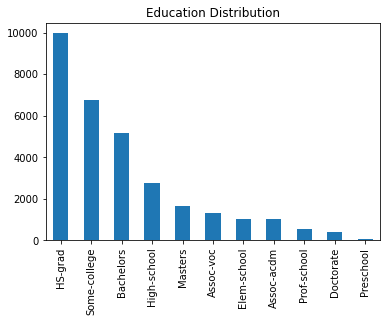

In [116]:
#finding number of people that make <=50k income and >50k income
print("Number of People with <=50K income in data set:", data[data['income'] == "<=50K"].shape[0]) 
print("Number of People with >50K income in data set:", data[data['income'] == ">50K"].shape[0])
print()

#find number of people that males & females
print("Number of males in data set:", data[data['sex'] == "Male"].shape[0]) 
print("Number of females in data set:", data[data['sex'] == "Female"].shape[0]) 
print()

#creating plot distribution by education, histogram
#number of people with certain educations
print("Distribution of Data Based on Received Education")
education_data = data['education'].value_counts()
education_data.plot(kind='bar', title = 'Education Distribution')

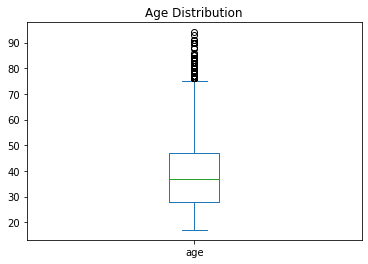

In [117]:
#creating box plot distribution by ages
age_data = data['age'].dropna().astype(float)
age_data.plot(kind='box', title='Age Distribution')

Q5. Create a plot to determine if there are any outliers in the  `capital-gain` column.  
Answer as a comment: What values would you consider to be outliers in this column? Explain why.

'Answer: I would say the values that are outliners of this data are the values near 100000 and around 40000 because there are only 3 points that are in those range and the rest of the data is under these extreme ranges'

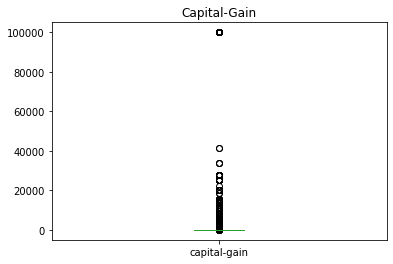

In [118]:
#create capital-gain box plot
data['capital-gain'].plot(kind='box', title='Capital-Gain')
'''Answer: I would say the values that are outliners of this data are the values near 100000 and around 40000 because there are only 3 points that are in those range and the rest of the data is under these extreme ranges'''

Q6. Using the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), group the data by  `marital-status`. 

Display each marital status along with it's mean age, in sorted order from least to greatest.

In [119]:
#take smaller data frame for marital and age columns
#temporary copy of data, okay to ignore SettingWithCopyWarning!
marital_age_data = data[['marital-status', 'age']]

#drop nans from marital_age_data and cast age to float, did I drop too many rows?
marital_age_data = marital_age_data.dropna(subset=['age'])
marital_age_data.loc[:,'age'] = marital_age_data.loc[:,'age'].astype(float)

#group by marital-status and print the mean's in ascending order
marital_group = marital_age_data.groupby('marital-status')
marital_group.describe()['age'].sort_values('mean').loc[:,['mean']]

,mean
marital-status,
Never-married,28.471218
Married-AF-spouse,31.250000
Separated,39.507821
Married-spouse-absent,40.290488
Married-civ-spouse,42.770487
Divorced,42.896333
Widowed,57.742857


Q7. Now fill in those missing age values, using similar case imputation. For each missing age, fill it in with the **median** age of that person's marital-status category. Use **median** rather than mean for this, so that we only use whole numbers for ages. Display the head of the dataframe.

In [120]:
#grab Series of medians by marital groups
marital_median = marital_group.median()



#create map from marital status to median
marital_age_dic = {'Divorced' : marital_median.iloc[0,0],
                   'Married-AF-spouse' : marital_median.iloc[1,0],
                   'Married-civ-spouse' : marital_median.iloc[2,0], 
                   'Married-spouse-absent' :  marital_median.iloc[3,0],
                   'Never-married' : marital_median.iloc[4,0], 
                   'Separated' : marital_median.iloc[5,0], 
                   'Widowed' : marital_median.iloc[6,0]}                    

#convert dictionary to Series then map marital-status to median age
marital_age_dic = pd.Series(marital_age_dic)
data.loc[data['age'].isnull(), 'age'] = data['marital-status'].map(marital_age_dic)

#print out data head
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Q8. Display everyone who is over 90 years old.  

In [121]:
#converting age string to int
data['age'] = pd.to_numeric(data['age'])

print("Data where Age is > 90\n")
data[data['age'] > 90]

Data where Age is > 90



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
222,91.0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
5272,94.0,Private,High-school,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
32277,91.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,93.0,Local-gov,Elem-school,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K


Q9. Create a scatter plot between `age` and `hours-per-week` **for only the first 100 datapoints in the dataset.**  
Place `age` on the X axis. Color each datapoint according to their income - one color for those that make <=50K, and another color for those that make >50K.

Answer as a comment: What observations or insights can you make by looking at this plot?

Text(0, 0.5, 'Hours-Per-Week')

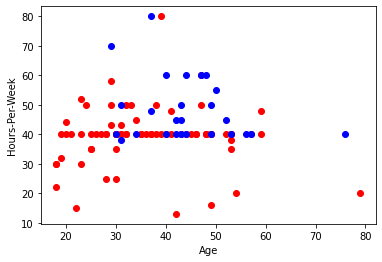

In [122]:
#plotting data for first 100 data rows
first_100 = data.head(100)

#break into classes
less_50 = first_100[first_100['income'] == "<=50K"]
more_50 = first_100[first_100['income'] == ">50K"]

#plots all points with <=50k as red
plt.scatter(less_50['age'], less_50['hours-per-week'], c='red')

#plots all points with >50k as blue
plt.scatter(more_50['age'], more_50['hours-per-week'], c='blue')

#labeling axis
plt.xlabel('Age')
plt.ylabel('Hours-Per-Week')

#Answers:
# - average amount of hours people work are 40 hours per week
# - people under 30 have an income of <=50k
# - most people only work until the age of 60 except the 2 outliers working between the ages of 70-80

Q10. Feature engineering: Using the dictionary provided below, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for Series [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [123]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Asia',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
}

In [124]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = data.copy()

# add the new column to adult_data_copy
continent_col = data['native-country'].map(continent_dict)

#add to end of dataframe
adult_data_copy.insert(14, 'continent', continent_col)
adult_data_copy.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,continent
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
5,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Plot a bar graph showing the average age of adults from each continent, and show the standard deviations on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

<ErrorbarContainer object of 3 artists>

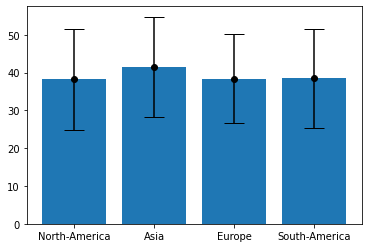

In [125]:
#split up x, y, and std values for bar graph
x_data = adult_data_copy['continent'].unique()
y_data = adult_data_copy.groupby(['continent'])['age'].mean()
y_error = adult_data_copy.groupby(['continent'])['age']

#create list of std's by each continent
y_std_list = {y_error.get_group('North-America').std(), y_error.get_group('Asia').std(),
              y_error.get_group('Europe').std(), y_error.get_group('South-America').std()}

#plot the bar graph and error bars
plt.bar(x_data, y_data)
plt.errorbar(x_data, y_data, y_std_list,color='black', fmt='o', capsize=10)

Q12. To reduce the dimensionality of this dataset via feature selection, which attribute or attributes would you eliminate? Explain why as a comment.

In [126]:
'''Attributes that I would get rid of are:
  -native-country, because we already have the continents column that groups them into a smaller subset to group by.
  -education number, assuming it means the number of years they went to school, because there is a strong positive
  correlation between the education number and education column that states their degrees/diplomas.
  -relationship, because marital-status bases off their status by their relationships. Having both would make one column useless
'''

'Attributes that I would get rid of are:\n  -native-country, because we already have the continents column that groups them into a smaller subset to group by.\n  -education number, assuming it means the number of years they went to school, because there is a strong positive\n  correlation between the education number and education column that states their degrees/diplomas.\n  -relationship, because marital-status bases off their status by their relationships. Having both would make one column useless\n'

## Part 2: Data Scaling and Dimensionality Reduction

For this part you'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

<img src="imgs/screen4.png">

Q13. Read the dataset from `leaf.csv` into a dataframe. Display the head of the dataframe.

In [127]:
#read in leaf data
leaf_data = pd.read_csv('leaf.csv', skipinitialspace=True)

#print head
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q14. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. As a comment, explain how you would handle these missing values, then go ahead and handle them (in code). Display the resulting head of the dataframe.

In [128]:
#TODO: explain more!!!
'''
Explain how to handle missing values:
  -Take the average of eccentricity by each class and replace rows with NaN by the average according to their classes
  because leaves in the same class should have similar eccentricity so it is a good idea to set it to their respective class averages
'''

#have separate dataframe only with class and eccentricity
leaf_ecc_data = leaf_data[['class','eccentricity']]

#drop rows with NaN, should be the rows with NaN in eccentricity columns
leaf_ecc_data = leaf_ecc_data.dropna()

#group by class
leaf_group = leaf_ecc_data.groupby('class')
leaf_group.describe()

#set nan values by class by mean values
leaf_ecc_mean = leaf_group.mean()

#create map from class value to corresponding eccentricity mean values
leaf_ecc_dic = {1 : leaf_ecc_mean.iloc[0,0], 2 : leaf_ecc_mean.iloc[1,0], 3 : leaf_ecc_mean.iloc[2,0], 4 : leaf_ecc_mean.iloc[3,0]}
leaf_ecc_dic = pd.Series(leaf_ecc_dic)
leaf_data.loc[leaf_data['eccentricity'].isnull(), 'eccentricity'] = leaf_data['class'].map(leaf_ecc_dic)

#print head of data
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.415627,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q15. Data scaling: Standardize the features in the `leaf_data` dataset so that all of the features are on the same scale.

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [129]:
#standardize data
scaler = StandardScaler()
numpy_array = scaler.fit_transform(leaf_data)
scaled_data = pd.DataFrame(numpy_array, columns=leaf_data.columns)

#print head of data frame
print("Head of Data")
scaled_data.head()

Head of Data


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,-1.196975,-0.602630,-0.531196,0.395212,-1.262773,-0.441095,-0.875478,1.116108,0.890913,-0.358758,-0.276976,-0.366061,-0.335186,-0.446737,-0.263256
1,1.470569,1.714954,1.447597,1.416854,0.559789,0.714453,-0.809227,-0.740953,-0.688901,-0.579956,-0.734593,-0.674961,-0.813314,-0.456439,-0.533339
2,0.581388,-1.493508,-0.522047,-1.012484,0.638209,0.692846,0.299095,-0.681097,-0.674420,0.557730,0.823063,0.635813,0.761190,0.043125,0.764238
3,-1.196975,-0.176728,-0.508525,0.691019,-1.598947,-1.434686,-0.953551,1.524256,1.551250,-0.417379,-0.354676,-0.423053,-0.379852,-0.496638,-0.322750
4,0.581388,-0.934921,-0.508165,-0.922422,0.637376,0.692846,0.395487,-0.588718,-0.647312,2.227521,1.846307,1.882116,1.424579,1.512359,2.769444


In [130]:
#print mean of each column
print("Mean of Each Columns")
scaled_data.mean()

Mean of Each Columns


class                       -4.483593e-17
eccentricity                -1.211638e-16
aspect-ratio                -5.337611e-18
elongation                   3.095814e-16
solidity                     7.301851e-16
stochastic-convexity         5.316260e-16
isoperimetric-factor         1.313052e-16
maximal-indentation-depth    1.558582e-16
lobedness                    1.067522e-16
average-intensity           -2.049643e-16
average-contrast            -4.611696e-16
smoothness                   4.270089e-17
third-moment                -1.195625e-16
uniformity                   3.416071e-17
entropy                     -3.416071e-17
dtype: float64

In [131]:
#print std of each column
print("Std of Each Columns")
scaled_data.std()

Std of Each Columns


class                        1.009756
eccentricity                 1.009756
aspect-ratio                 1.009756
elongation                   1.009756
solidity                     1.009756
stochastic-convexity         1.009756
isoperimetric-factor         1.009756
maximal-indentation-depth    1.009756
lobedness                    1.009756
average-intensity            1.009756
average-contrast             1.009756
smoothness                   1.009756
third-moment                 1.009756
uniformity                   1.009756
entropy                      1.009756
dtype: float64

Q16. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensions are necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [132]:
#perform PCA on scaled data
pca = PCA(n_components=0.95, svd_solver= 'full')
princip_comp = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(princip_comp)

#resulting data frame is 52x4
pca_data.head()

,0,1,2,3
0,-1.829002,-1.888197,0.022065,0.091680
1,-1.376523,3.246110,-1.221339,-0.238521
2,2.412789,-0.210715,0.507290,1.111356
3,-2.648967,-2.455226,-0.458040,-0.219275
4,4.910001,-1.109855,-1.218397,-0.154251
